# Public Health Risk: From Vitals To Intervention - Caden Luu (11/23/25)

Use anonymized, real-world patient records to understand patient health risk levels. The goal is to create a tool that allows for early clinical intervention and better resource allocation in clinical settings, all while practicing data science on healthcare data without exposing personal patient information.
- **Description:** An anonymized dataset of 1,000 real-world patient records with vital signs, licensed under Apache 2.0.
- **Key Features:**
- Vital signs such as respiratory rate, oxygen saturation, systolic blood pressure, heart rate, and a categorical oxygen therapy scale.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [3]:
df = pd.read_csv('Health_Risk_Dataset.csv')
df.head()

,Patient_ID,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness,On_Oxygen,Risk_Level
0,P0522,25,96,1,97,107,37.5,A,0,Medium
1,P0738,28,92,2,116,151,38.5,P,1,High
2,P0741,29,91,1,79,135,38.4,A,0,High
3,P0661,24,96,1,95,92,37.3,A,0,Medium
4,P0412,20,96,1,97,97,37.4,A,0,Low


## Data Preprocessing

### Check for Missing Values

In [4]:
df.isnull().sum()

Patient_ID           0
Respiratory_Rate     0
Oxygen_Saturation    0
O2_Scale             0
Systolic_BP          0
Heart_Rate           0
Temperature          0
Consciousness        0
On_Oxygen            0
Risk_Level           0
dtype: int64

### Check for duplicates

In [5]:
sum(df.duplicated())

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         1000 non-null   object 
 1   Respiratory_Rate   1000 non-null   int64  
 2   Oxygen_Saturation  1000 non-null   int64  
 3   O2_Scale           1000 non-null   int64  
 4   Systolic_BP        1000 non-null   int64  
 5   Heart_Rate         1000 non-null   int64  
 6   Temperature        1000 non-null   float64
 7   Consciousness      1000 non-null   object 
 8   On_Oxygen          1000 non-null   int64  
 9   Risk_Level         1000 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 78.3+ KB


In [7]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,37.921000,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,1.113696,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,35.600000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,37.100000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,37.800000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,38.600000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,41.800000,1.000000


In [8]:
# Drop Patient_ID Column
df = df.drop(columns = ['Patient_ID'])

In [9]:
# Convert Temperature to Celsius
df['Temperature'] = (df['Temperature'] * 9/5) + 32

In [10]:
df.describe()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,On_Oxygen
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.511000,92.59000,1.124000,106.160000,98.460000,100.257800,0.274000
std,5.287517,4.47302,0.329746,17.897562,19.694626,2.004653,0.446232
min,12.000000,74.00000,1.000000,50.000000,60.000000,96.080000,0.000000
25%,17.000000,90.00000,1.000000,94.000000,84.000000,98.780000,0.000000
50%,20.000000,94.00000,1.000000,109.000000,95.500000,100.040000,0.000000
75%,25.000000,96.00000,1.000000,119.000000,109.000000,101.480000,1.000000
max,40.000000,100.00000,2.000000,146.000000,163.000000,107.240000,1.000000


## Exploratory Data Analysis

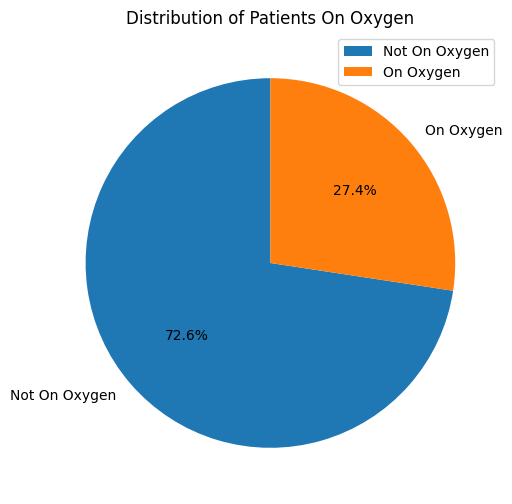

In [11]:
plt.figure(figsize=(8,6))
plt.pie(df['On_Oxygen'].value_counts(), 
        labels = ['Not On Oxygen', 'On Oxygen'],
        autopct = '%1.1f%%',
        startangle = 90
        )
plt.title('Distribution of Patients On Oxygen')
plt.legend()
plt.show()

<Axes: xlabel='Respiratory_Rate', ylabel='Temperature'>

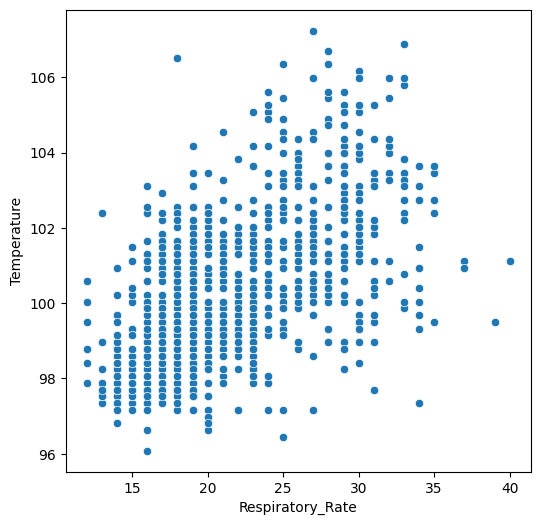

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Respiratory_Rate', y='Temperature', data = df)

<Axes: xlabel='Heart_Rate', ylabel='Respiratory_Rate'>

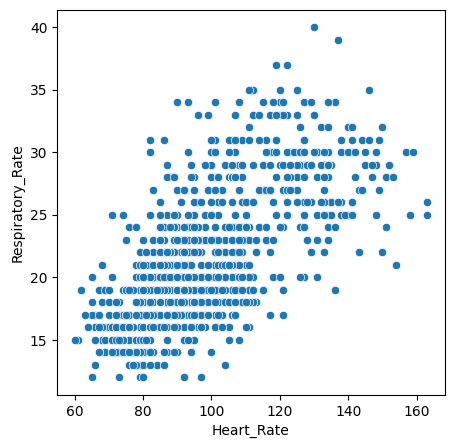

In [13]:
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Heart_Rate', y = 'Respiratory_Rate', data = df)

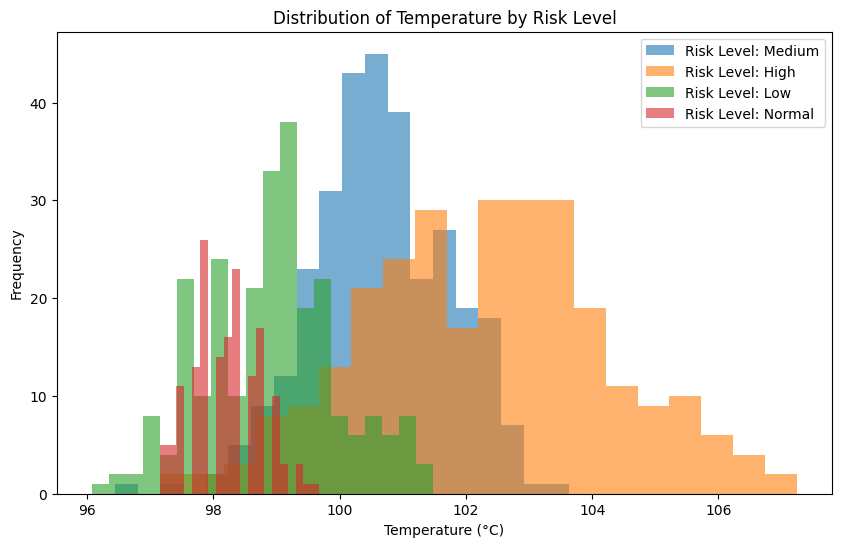

In [14]:
plt.figure(figsize=(10,6))

for risk in df['Risk_Level'].unique():
    subset = df[df['Risk_Level'] == risk]
    plt.hist(subset['Temperature'], alpha=0.6, label = f'Risk Level: {risk}', bins = 20)

plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title("Distribution of Temperature by Risk Level")
plt.legend()
plt.show()

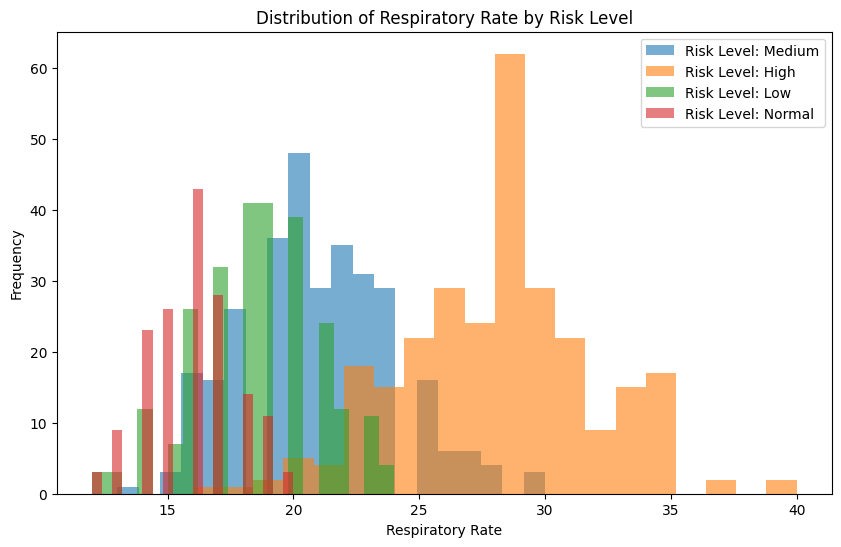

In [15]:
plt.figure(figsize=(10,6))

for risk in df['Risk_Level'].unique():
    subset = df[df['Risk_Level'] == risk]
    plt.hist(subset['Respiratory_Rate'], alpha=0.6, label = f'Risk Level: {risk}', bins = 20)

plt.xlabel('Respiratory Rate')
plt.ylabel('Frequency')
plt.title("Distribution of Respiratory Rate by Risk Level")
plt.legend()
plt.show()

<Axes: >

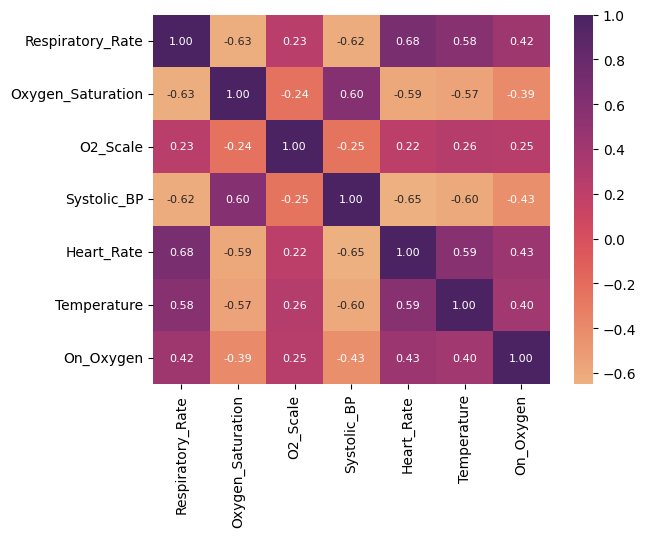

In [16]:
numeric_df = df.select_dtypes(include = 'number')
sns.heatmap(numeric_df.corr(),
            annot = True,
            annot_kws = {'fontsize': 8},
            cmap = 'flare',
            fmt = '.2f')

### What Exploratory Data Analysis Tells Us

* Moderate positive linear correlation between *Respiratory_Rate* and *Temperature*
* Moderate positive linear correlation between *Respiratory_Rate* and *Heart_Rate*
* High Risk patients tend to have higher temperatures (38 Celsius and above)
* High Risk patients breath much faster (25 breaths per minute and above) - which tends for them to be *On_Oxygen*


### One Hot Encoding

In [17]:
df = pd.get_dummies(df, columns = ['Consciousness', 'On_Oxygen'])
cols = df.columns.tolist()
cols.remove('Risk_Level')
cols.append("Risk_Level")
df = df[cols]
df.head()

,Respiratory_Rate,Oxygen_Saturation,O2_Scale,Systolic_BP,Heart_Rate,Temperature,Consciousness_A,Consciousness_C,Consciousness_P,Consciousness_U,Consciousness_V,On_Oxygen_0,On_Oxygen_1,Risk_Level
0,25,96,1,97,107,99.50,True,False,False,False,False,True,False,Medium
1,28,92,2,116,151,101.30,False,False,True,False,False,False,True,High
2,29,91,1,79,135,101.12,True,False,False,False,False,True,False,High
3,24,96,1,95,92,99.14,True,False,False,False,False,True,False,Medium
4,20,96,1,97,97,99.32,True,False,False,False,False,True,False,Low


## Splitting Data Into Training and Testing Sets

In [18]:
X = df.drop('Risk_Level', axis =1)
y = df['Risk_Level']
y.value_counts()

Risk_Level
Medium    306
High      279
Low       255
Normal    160
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

### Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_fs = X_train.copy()
X_test_fs = X_test.copy()

X_train_fs.iloc[:, :6] = sc.fit_transform(X_train_fs.iloc[:, :6])
X_test_fs.iloc[:, :6] = sc.transform(X_test_fs.iloc[:, :6])

## Building Models

### Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state = 42)

rfc_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfc_random_search = RandomizedSearchCV(rf, 
                                       rfc_param_dist, 
                                       n_iter=100, 
                                       cv=5, 
                                       scoring = 'recall_weighted', 
                                       n_jobs=-1)
rfc_random_search.fit(X_train, y_train)
rfc_pred = rfc_random_search.predict(X_test)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_fs, y_train)
lr_pred = lr.predict(X_test_fs)

### XGBClassifier

In [23]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


xgb = XGBClassifier(objective = 'multi:softmax',eval_metric = 'logloss', random_state = 42)

xgb_param_dist = {
    'n_estimators': randint(100,1000),
    'learning_rate': uniform(0.01,0.2),
    'max_depth': randint(3,10),
    'subsample': uniform(0.6,0.4),
    'colsample_bytree': uniform(0.6,0.4),
    'gamma': uniform(0,0.05),
    'min_child_weight': randint(0,10)
}
xgb_random_search = RandomizedSearchCV(
    xgb,
    xgb_param_dist,
    scoring = 'recall_weighted',
    n_iter = 100,
    cv = 5,
    n_jobs = -1,
    random_state =42
)

xgb_random_search.fit(X_train, y_train_encoded)
xgb_pred = xgb_random_search.predict(X_test)



## Evaluate Models

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Decode XGBClassifier predictions
xgb_pred_decoded = le.inverse_transform(xgb_pred)
models = {
    'Random Forest Classifier': rfc_pred,
    'Logistic Regression': lr_pred,
    'XGBClassifier': xgb_pred_decoded
}
print("MODEL EVALUATION BEFORE FEATURE ENGINEERING")
print("-" * 43 + "\n")
for model, preds in models.items():
    acc = accuracy_score(y_test,preds)
    precision = precision_score(y_test,preds,average = 'weighted')
    recall = recall_score(y_test,preds,average = 'weighted')
    print(f"{model} accuracy score: {acc * 100:.2f}%")
    print(f"{model} precision score: {precision * 100:.2f}%")
    print(f"{model} recall score: {recall * 100:.2f}% \n")


MODEL EVALUATION BEFORE FEATURE ENGINEERING
-------------------------------------------

Random Forest Classifier accuracy score: 97.50%
Random Forest Classifier precision score: 97.53%
Random Forest Classifier recall score: 97.50% 

Logistic Regression accuracy score: 96.00%
Logistic Regression precision score: 96.12%
Logistic Regression recall score: 96.00% 

XGBClassifier accuracy score: 97.50%
XGBClassifier precision score: 97.53%
XGBClassifier recall score: 97.50% 



## Building Model with Engineered Features

* **Has_Fever** - *Temperature* of above 100.4 F and *Heart_Rate* between 60-100

### Random Forest Classifier With Feature Engineering

In [25]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

X_train_df['Has_Fever'] = (X_train_df['Temperature'] >= 100.4) & (X_train_df['Heart_Rate'] >= 95).astype(int)
X_test_df['Has_Fever'] = (X_test_df['Temperature'] >= 100.4) & (X_test_df['Heart_Rate'] >= 95).astype(int)

X_train_df.columns = X_train_df.columns.astype(str)
X_test_df.columns = X_test_df.columns.astype(str)

rfc_fe = RandomForestClassifier(random_state = 42)
rfc_fe_random_search = RandomizedSearchCV(rfc_fe, 
                                       rfc_param_dist, 
                                       n_iter=100, 
                                       cv=5, 
                                       scoring = 'recall_weighted', 
                                       n_jobs=-1,
                                       random_state = 42)
rfc_fe_random_search.fit(X_train_df, y_train)
rfc_fe_pred = rfc_fe_random_search.predict(X_test_df)


### Logistic Regression

In [26]:
lr_fe = LogisticRegression(random_state = 42)

lr_fe.fit(X_train_df, y_train)
lr_fe_pred = lr_fe.predict(X_test_df)

### XGB Classifier

In [27]:
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
X_train_df = X_train_df.astype(float)
X_test_df = X_test_df.astype(float)

xgb_fe = XGBClassifier(objective = 'multi:softmax',eval_metric = 'logloss', random_state = 42)
xgb_fe_random_search = RandomizedSearchCV(
    xgb_fe,
    xgb_param_dist,
    scoring = 'recall_weighted',
    n_iter = 100,
    cv = 5,
    n_jobs = -1,
    random_state=42
)
xgb_fe_random_search.fit(X_train_df, y_train_encoded)
xgb_fe_pred = xgb_fe_random_search.predict(X_test_df)

## Evaluating Feature Engineered Models

In [28]:
xgb_fe_pred_decoded = le.inverse_transform(xgb_fe_pred)
fe_models = {
    'Random Forest Classifier':rfc_fe_pred,
    'Logistic Regression': lr_fe_pred,
    'XGB Classifier': xgb_fe_pred_decoded
}
print("MODELS EVALUATION AFTER FEATURE ENGINEERING")
print("-" * 45)
for model, pred in fe_models.items():
    fe_acc = accuracy_score(y_test,pred)
    fe_precision = precision_score(y_test,pred, average ='weighted')
    fe_recall = recall_score(y_test,pred, average = 'weighted')
    
    print(f"{model} accuracy score: {fe_acc * 100:.2f}%")
    print(f"{model} precision score: {fe_precision * 100:.2f}%")
    print(f"{model} recall score: {fe_recall * 100:.2f}% \n")
    

MODELS EVALUATION AFTER FEATURE ENGINEERING
---------------------------------------------
Random Forest Classifier accuracy score: 97.00%
Random Forest Classifier precision score: 97.03%
Random Forest Classifier recall score: 97.00% 

Logistic Regression accuracy score: 94.50%
Logistic Regression precision score: 94.60%
Logistic Regression recall score: 94.50% 

XGB Classifier accuracy score: 98.00%
XGB Classifier precision score: 98.02%
XGB Classifier recall score: 98.00% 



### Confusion Matrix for XGB Classifier

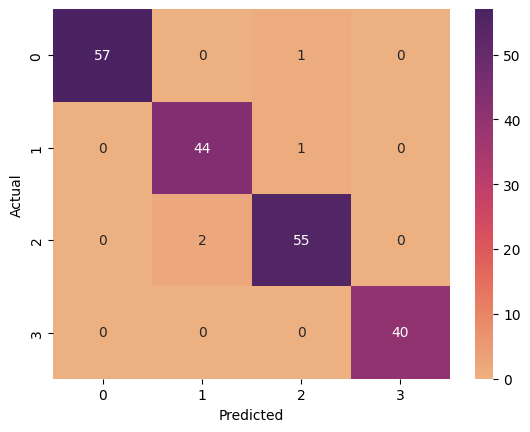

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,xgb_fe_pred_decoded)


sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'flare')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Saving Model

In [32]:
import joblib
model_info = {
    'model': xgb_fe_random_search,
    'feature_names': X_train_df.columns.tolist(),
    'label_encoder': le,
    'feature_engineer_info': {
        'has_fever_temp_threshold': 100.4,
        'has_fever_hr_threshold':95,
        'temp_unit': 'fahrenheit'
    }
}
filename = 'health_risk_model.pkl'
joblib.dump(model_info,filename)
print('Model saved successfully!')


Model saved successfully!
